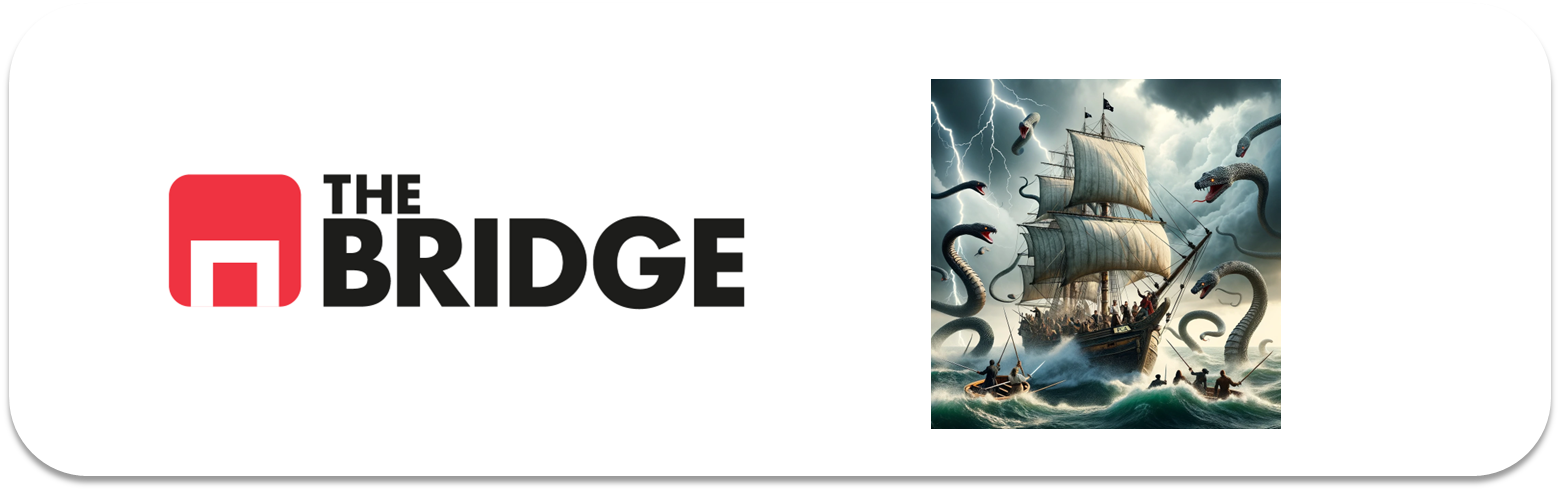

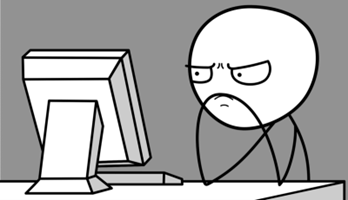

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:

df_nutri = pd.read_csv('./data/nutrition.csv')
df_nutri.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [4]:
corr = df_nutri.corr(numeric_only=True)
corr

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,-0.011996,0.177297,0.082710,0.008252,-0.031211,-0.060463,0.016512,...,-0.051166,0.010387,-0.024343,0.011311,-0.050720,-0.003765,-0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,-0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,-0.301974,-0.266170,-0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,-0.011996,0.806795,0.054715,1.000000,-0.054116,-0.001962,-0.028842,0.024379,-0.046950,-0.020786,...,-0.058049,-0.022671,-0.036286,-0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,-0.301974,-0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,-0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,-0.114600,-0.012187
Sugar_g,0.082710,0.313151,-0.266170,-0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,-0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,-0.005837,0.041308,-0.049784,-0.123708,-0.021991
Fiber_g,0.008252,0.197338,-0.072777,-0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,-0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,-0.035897,0.085154
VitA_mcg,-0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,-0.060463,0.121872,0.228485,-0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,-0.012292,0.245423,-0.020786,-0.094636,-0.050450,-0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [5]:
# No aportan mucho ya que es la cantidad diaria recomendada, no lo que contiene cada grupo de alimento y, ademas, esta informacion ya viene en otras variables.
# Y no tienen correlacion con ninguna variable a simple vista

df = df_nutri.copy()

for col in df.columns:
    if 'USRDA' in col:
        df.drop(columns=col, inplace=True)

df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [6]:
df['FoodGroup'].dtypes

dtype('O')

In [7]:
for col in df.columns:
    if df[col].dtypes == 'O' or col == 'ID':
        df.drop(columns=col, inplace=True)

df.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


In [8]:
df.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.237248,0.209857,73.411348,0.172181,2.696771,32.745301,0.504439,155.986308,12.614945,1.970216
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.449880,0.518369,201.363662,0.553052,5.726967,56.068454,6.383438,203.093234,28.292347,3.358213
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.046000,0.030000,9.000000,0.030000,0.530000,10.000000,0.000000,37.000000,0.100000,0.230000
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.150000,0.077500,19.000000,0.079000,1.330000,20.000000,0.022000,133.000000,3.900000,0.845000
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.260000,0.223000,62.000000,0.144750,2.580000,29.000000,0.222000,216.000000,21.300000,2.700000
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,17.500000,23.375000,7364.000000,15.050000,123.600000,781.000000,328.000000,9918.000000,1917.000000,90.950000


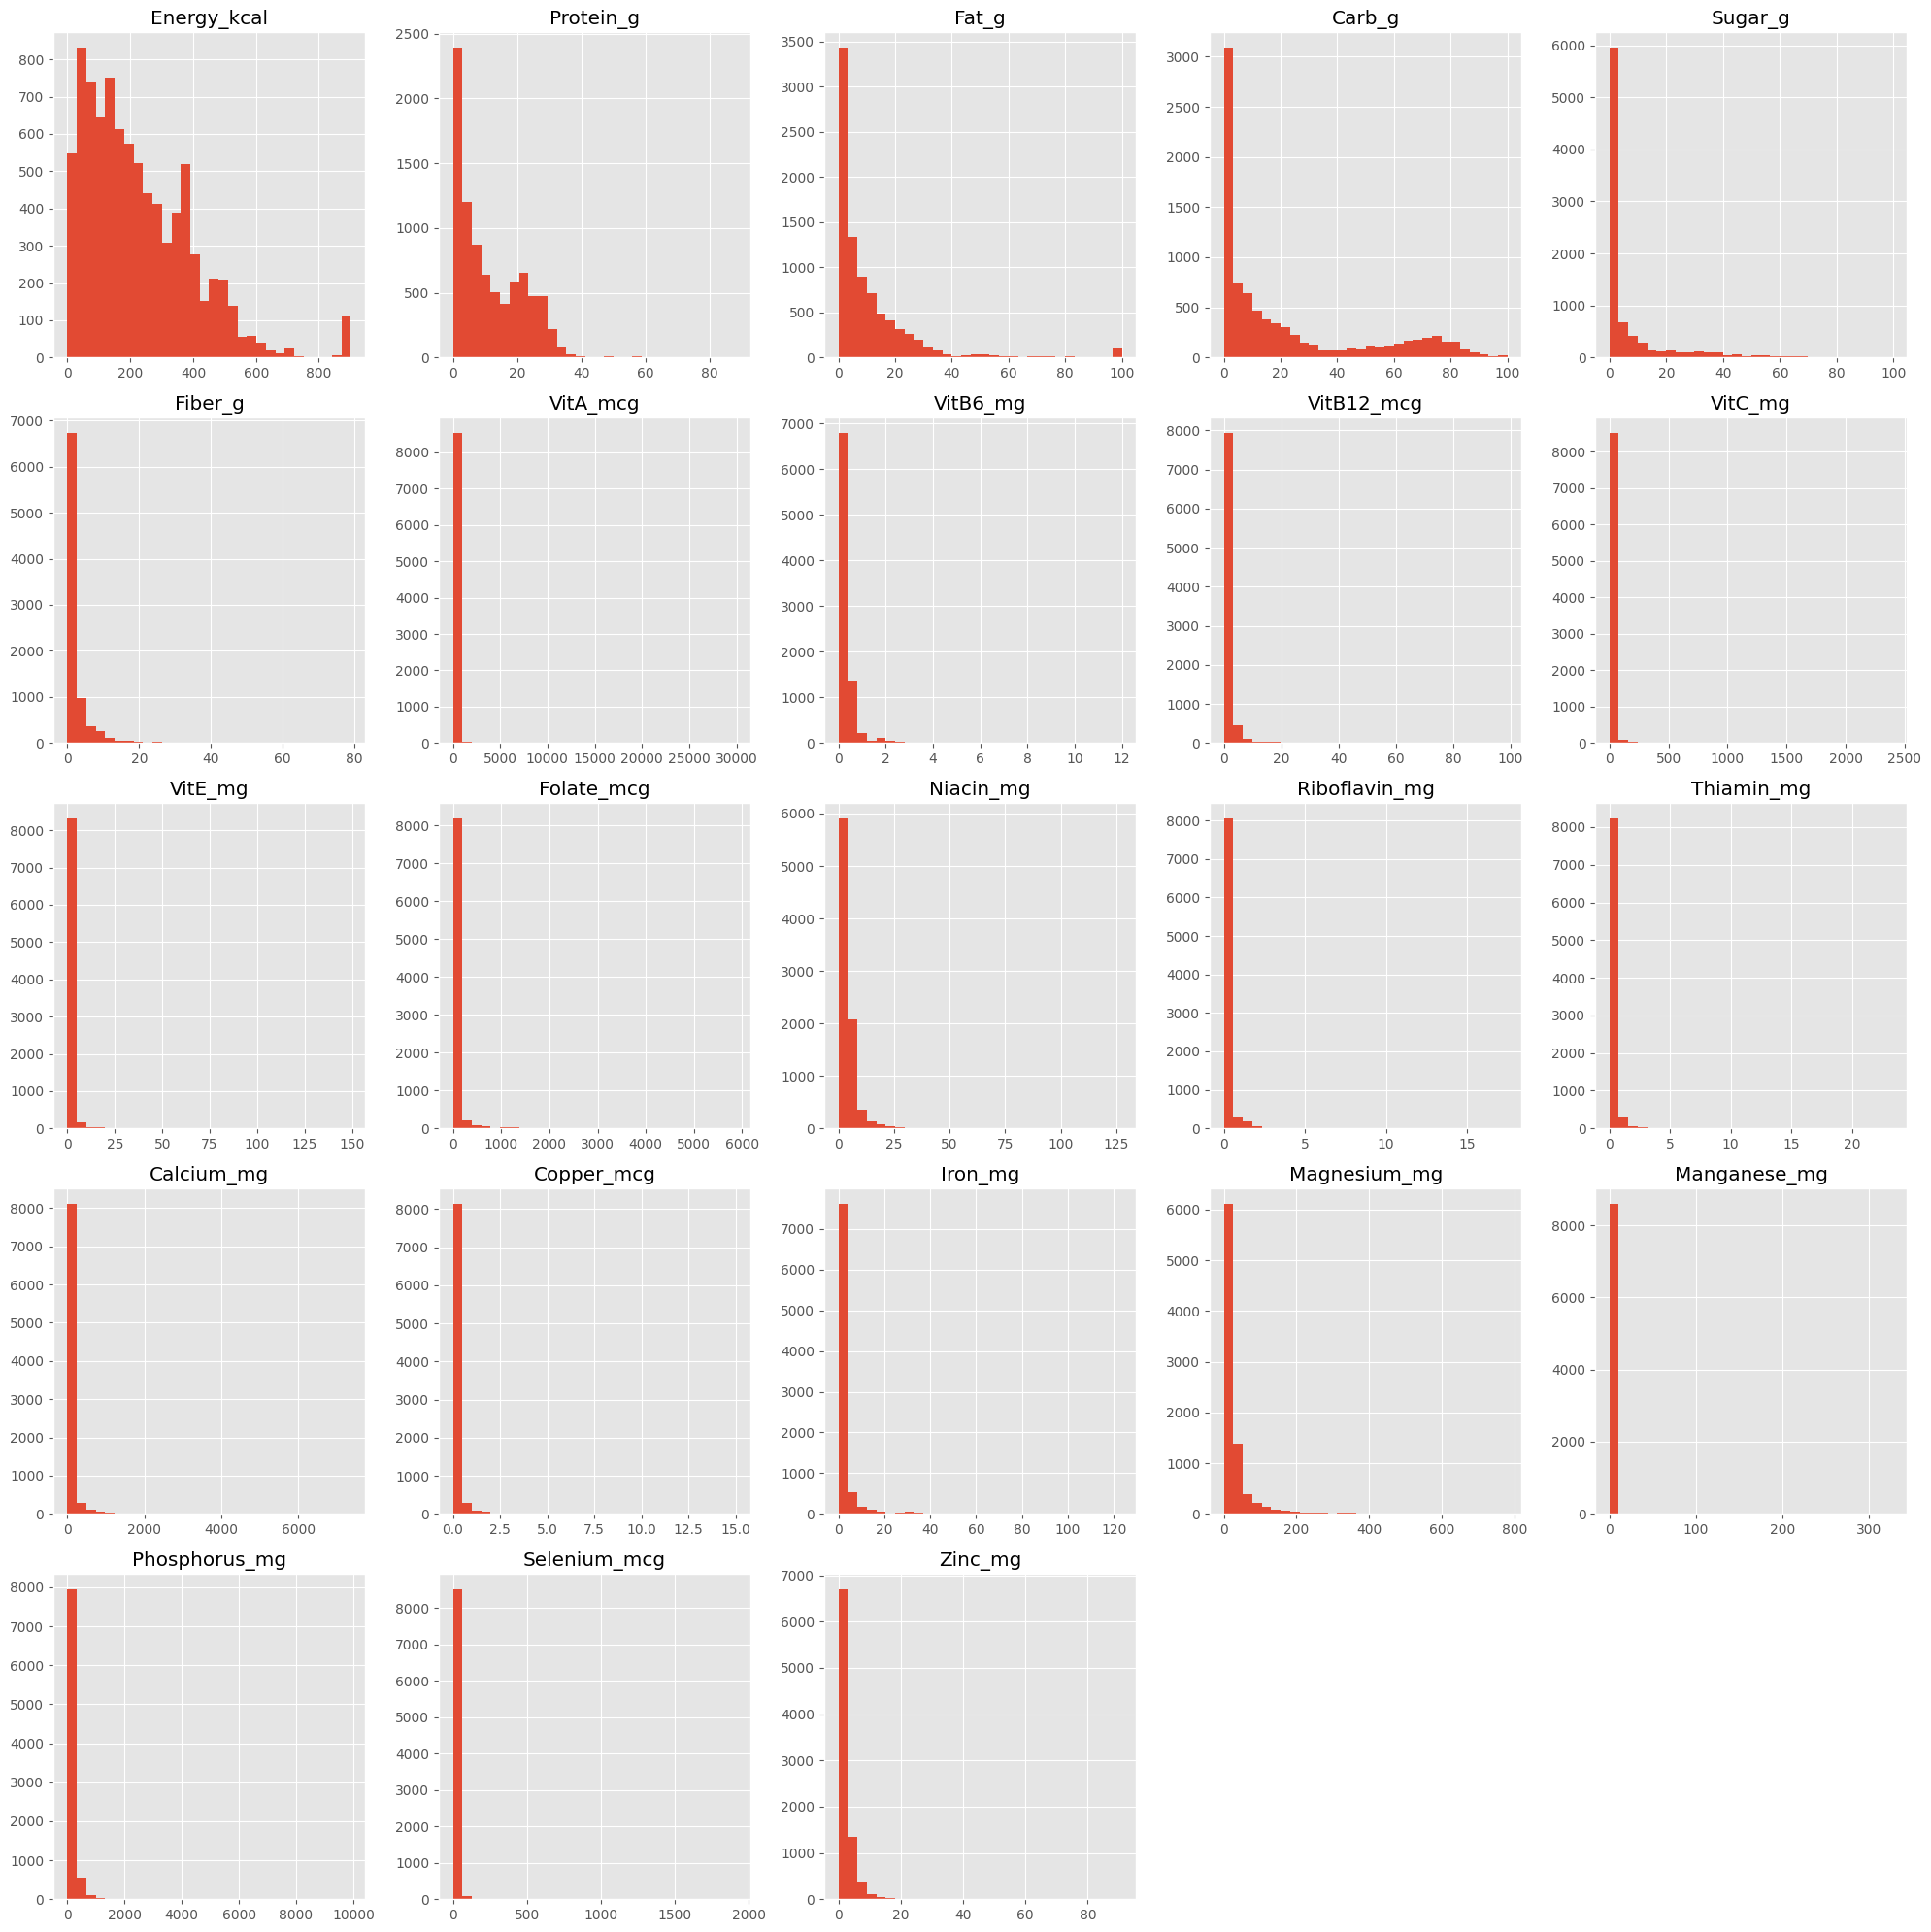

In [9]:
df.hist(bins=30, figsize=(20,20))
plt.tight_layout();

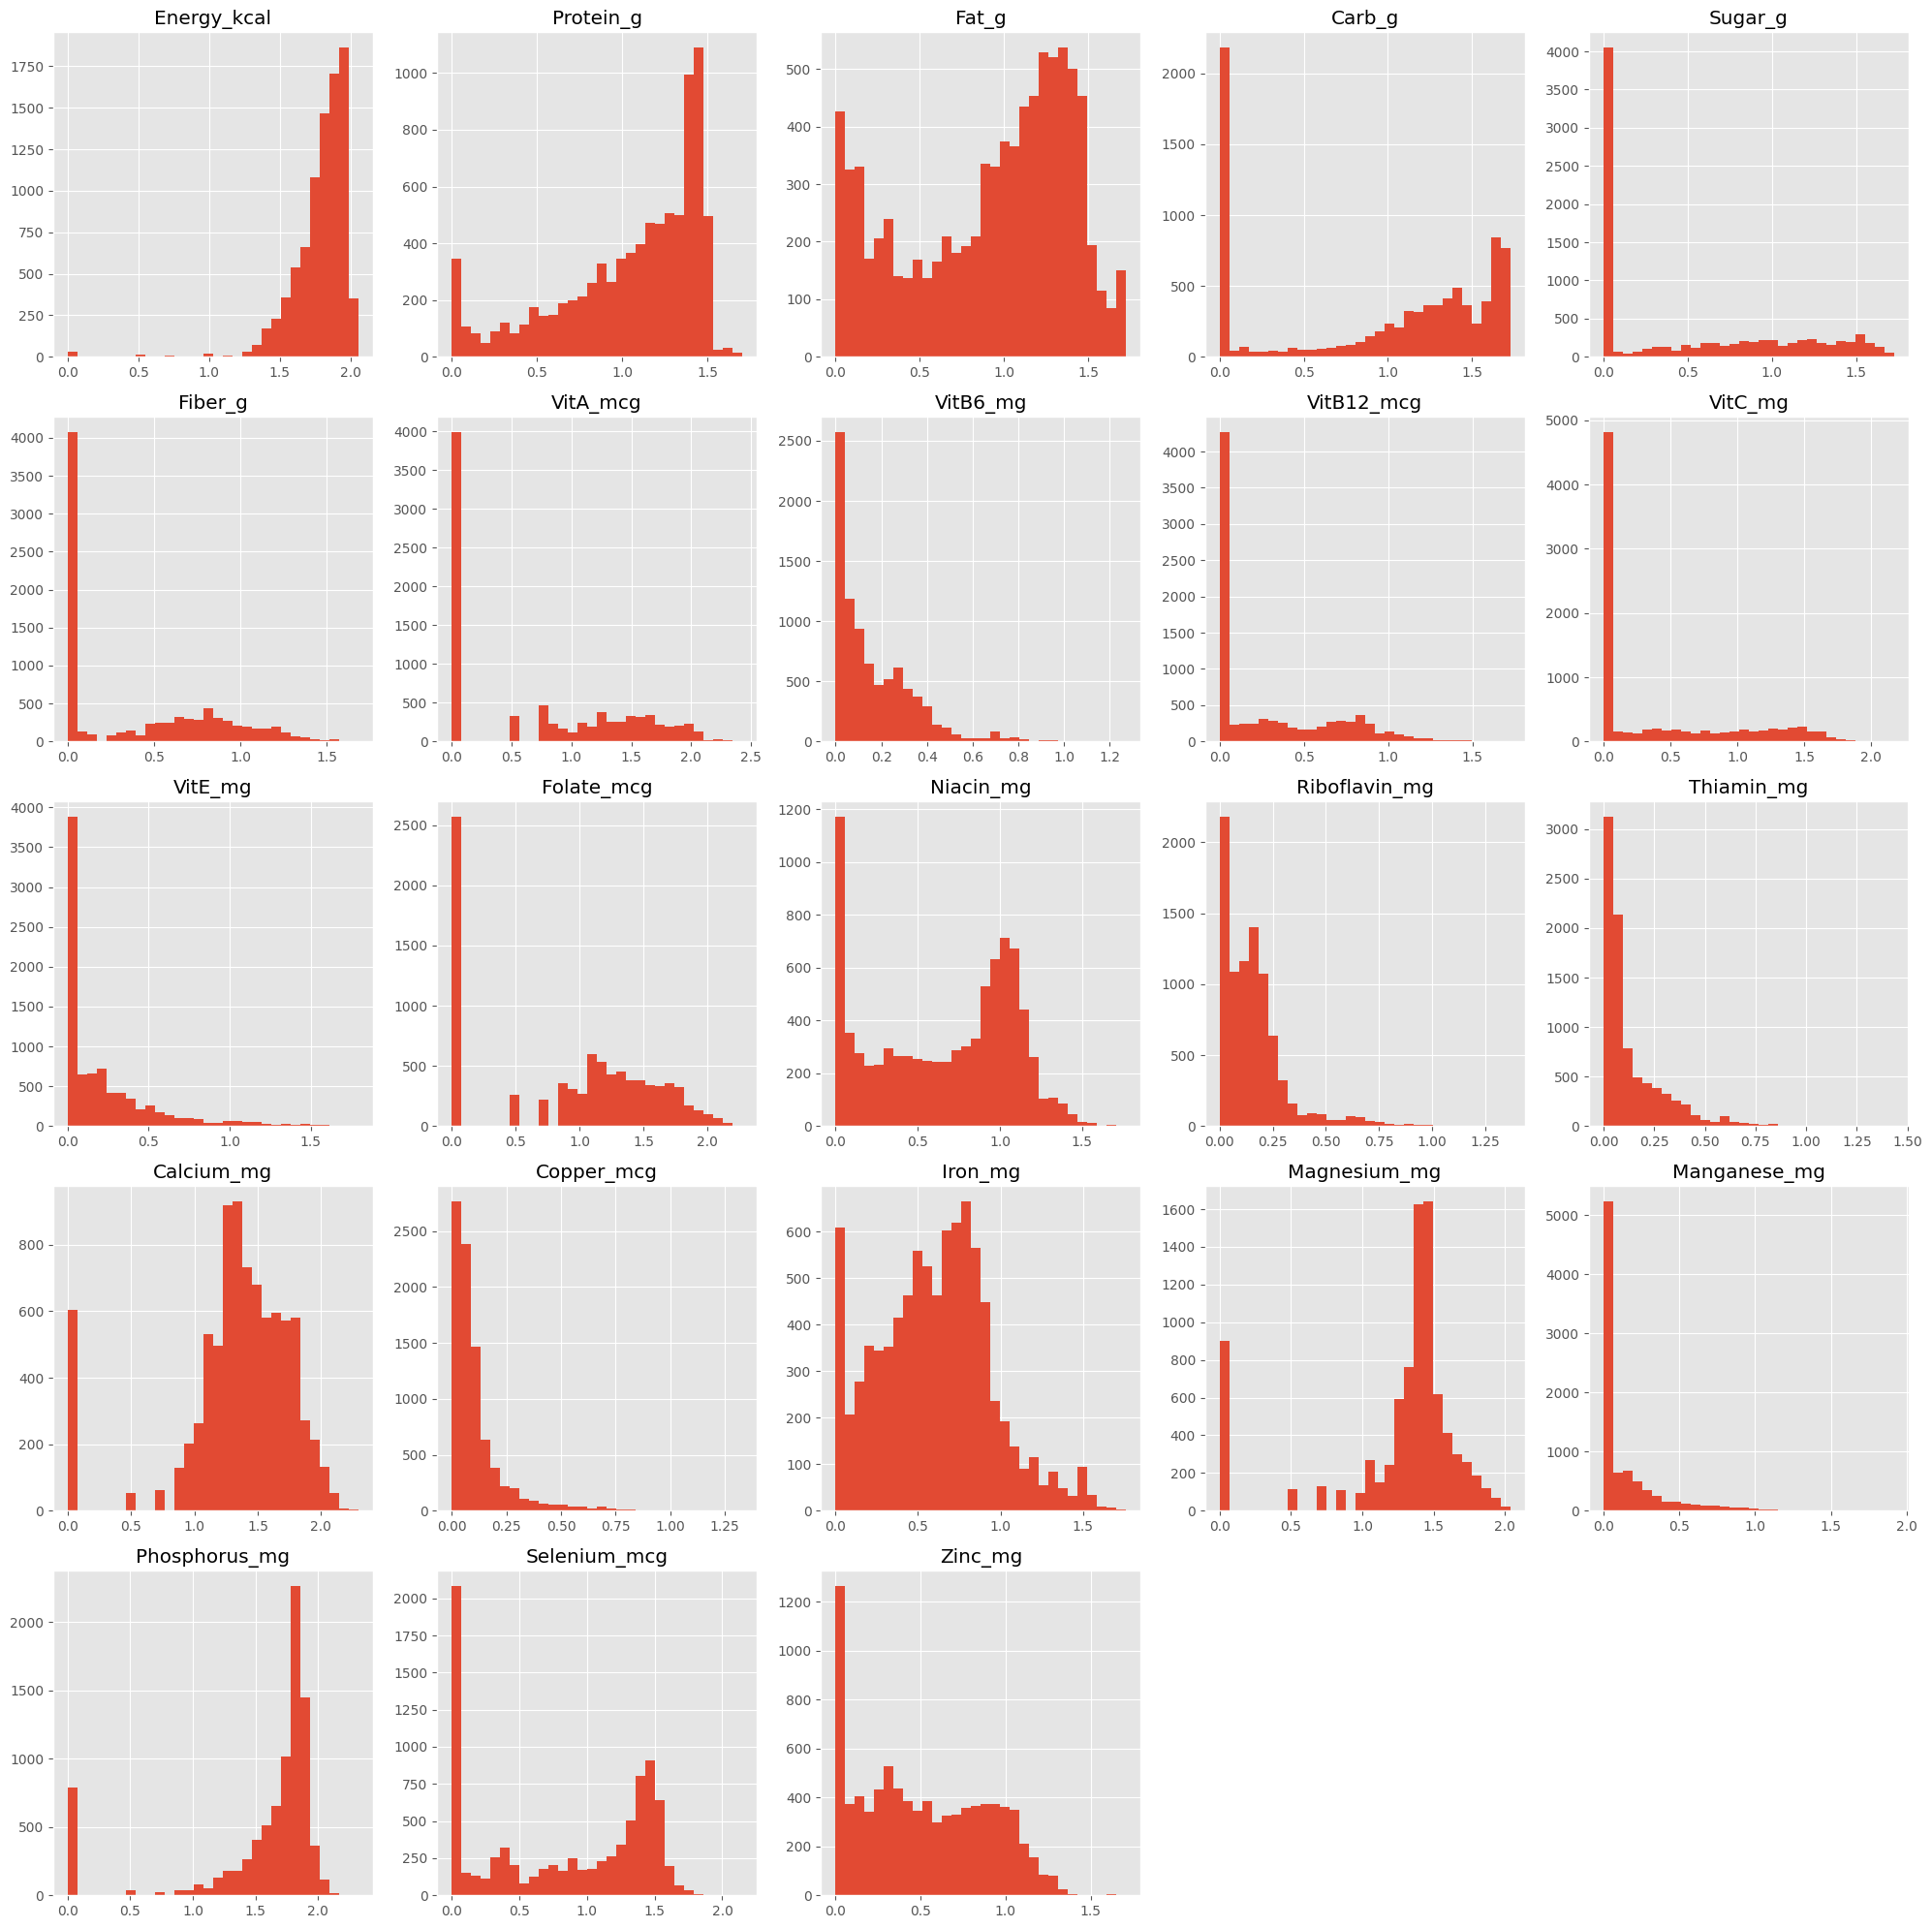

In [11]:
# Hacemos una transformacion logaritmica a todas las variables teniendo en cuenta los valores 0
for col in df.columns:
    desplaza = 0
    if df[col].min() <= 0:
        desplaza = int(abs(df[col].min())) + 1
    df[col] = np.log(df[col] + desplaza)

df.hist(bins=30, figsize=(20,20))
plt.tight_layout()

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [12]:
standar = StandardScaler()

features = df.columns.to_list()

df[features] = standar.fit_transform(df[features])

In [65]:
df.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,...,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03
mean,-2.160155e-16,2.077707e-16,9.151804e-17,2.473460e-16,-1.220240e-16,-1.896320e-17,1.022364e-16,5.441613e-17,-5.111818e-17,4.122434e-17,...,1.005874e-16,-7.915073e-17,5.936305e-17,-1.620117e-16,1.203751e-16,5.194267e-17,-1.566525e-17,-4.452229e-17,-1.401628e-16,2.044727e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-5.207330e+00,-1.961806e+00,-1.510128e+00,-1.315522e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-8.238454e-01,-6.936126e-01,-6.350195e-01,...,-8.399996e-01,-7.050583e-01,-2.092453e+00,-6.242369e-01,-1.318770e+00,-2.173767e+00,-4.782942e-01,-2.480348e+00,-1.184060e+00,-1.150447e+00
25%,-5.457117e-01,-7.845487e-01,-9.263689e-01,-1.291167e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-6.835452e-01,-6.936126e-01,-6.350195e-01,...,-6.323408e-01,-5.719706e-01,-5.645306e-01,-4.784691e-01,-7.217313e-01,-3.181753e-01,-4.782942e-01,-3.635339e-01,-1.117607e+00,-8.527826e-01
50%,1.870891e-01,1.467749e-01,3.962894e-02,1.108632e-01,-5.506944e-01,-4.976256e-01,-3.927255e-01,-3.517040e-01,-5.760347e-01,-6.350195e-01,...,-1.946664e-01,-3.689783e-01,-1.045803e-01,-2.492755e-01,-1.312444e-01,1.822119e-01,-4.214700e-01,3.698432e-01,-7.599149e-02,-2.697727e-01
75%,7.643284e-01,9.180010e-01,7.773286e-01,8.723726e-01,6.428538e-01,6.756910e-01,6.811104e-01,4.418293e-01,5.772068e-01,3.544323e-01,...,2.271297e-01,2.013203e-01,6.567993e-01,4.242737e-02,4.717289e-01,4.582220e-01,4.522832e-02,6.503660e-01,9.805632e-01,7.307952e-01
max,1.775637e+00,2.288877e+00,2.397860e+00,1.550276e+00,2.811782e+00,4.530055e+00,4.212004e+00,9.862054e+00,6.340292e+00,5.512622e+00,...,1.263244e+01,1.367385e+01,3.816285e+00,1.306404e+01,5.455266e+00,2.981455e+00,1.465655e+01,2.874676e+00,4.086359e+00,5.350618e+00


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [13]:
pca = PCA()
pca.fit(df)

PCA()

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [15]:
pd.DataFrame(
    data = pca.components_,
    columns = df.columns,
    index = [f'PC{num}' for num in range(1, len(df.columns)+1)]
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.183006,0.293104,0.181272,-0.059334,-0.063696,0.019103,0.075865,0.259596,0.225635,-0.047336,...,0.259327,0.214394,0.157879,0.187285,0.274904,0.265919,0.117953,0.281460,0.264595,0.314497
PC2,0.006459,-0.153351,-0.155995,0.441721,0.320731,0.411931,0.099674,-0.007567,-0.258086,0.268684,...,0.066208,0.173528,0.187848,0.191302,0.114658,0.129026,0.319424,0.025875,-0.150447,-0.118396
PC3,0.421046,0.077515,0.359676,0.181244,0.218243,0.181111,-0.330938,-0.012251,-0.083349,-0.308076,...,0.098475,0.242790,-0.235121,-0.067570,0.163033,-0.213763,-0.024052,-0.148881,-0.166247,-0.026926
PC4,-0.180375,-0.146101,-0.187467,-0.022087,0.191688,-0.050941,0.168843,0.372232,0.270771,0.323300,...,0.386163,0.298403,-0.129017,-0.235550,0.070936,-0.183276,-0.304572,-0.160976,-0.156846,-0.034077
PC5,0.266000,-0.067988,0.352936,0.005464,0.240163,-0.123589,0.484179,-0.072027,0.067353,0.047493,...,-0.032472,-0.148526,0.116431,-0.121332,-0.175460,-0.055289,-0.163135,0.008811,0.108123,-0.068656
PC6,-0.094592,-0.180528,-0.005263,-0.213139,-0.222548,-0.040673,-0.141586,0.177379,0.029451,0.079801,...,-0.001870,0.010581,-0.352454,0.431663,0.007834,-0.180405,0.335096,-0.308409,0.008895,0.077899
PC7,0.080206,0.137959,0.158350,0.017789,-0.113980,-0.132587,0.210156,-0.118920,0.172245,0.131515,...,0.167337,-0.087403,0.436204,0.340045,0.210411,-0.352569,0.113951,-0.317654,-0.140325,0.033363
PC8,0.112008,-0.048827,0.105259,0.072531,-0.360050,-0.093423,0.552047,-0.106564,-0.252671,-0.107502,...,0.139725,0.282063,-0.396423,0.011612,-0.065708,-0.037082,0.153365,0.055651,-0.009462,-0.242848
PC9,0.375344,-0.010183,0.150422,0.013426,-0.002756,-0.070775,-0.095474,-0.054947,0.066218,0.642883,...,-0.159674,-0.227466,-0.368969,0.145216,0.086720,0.161910,-0.153001,0.159239,-0.188521,0.102768
PC10,0.131701,-0.122715,-0.103435,0.164657,0.364589,-0.255160,-0.170560,-0.181656,0.187161,-0.139134,...,0.208021,-0.002293,-0.177708,0.134666,-0.126519,-0.149620,-0.034468,-0.147656,0.374634,0.030816


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


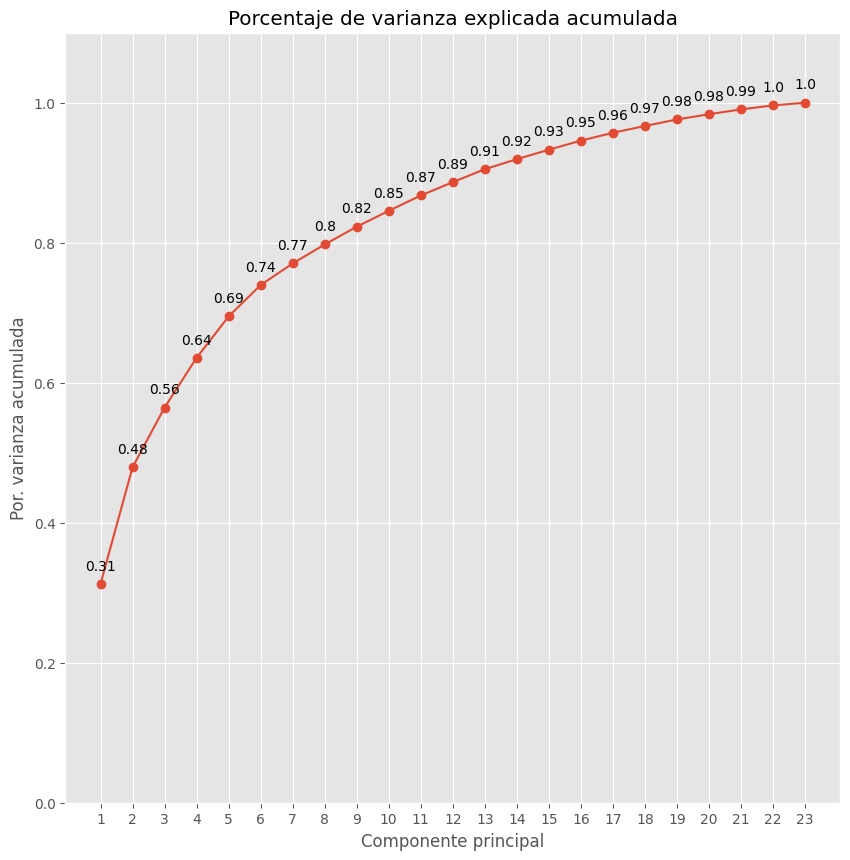

In [82]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Con un 70-75% me quedaría con 5 o 6 componentes

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [17]:
pca_5 = PCA(5)

pca_5.fit(df)

PCA(n_components=5)

In [18]:
df_pca = pca_5.transform(df)

In [21]:
pd.DataFrame(df_pca,
             columns=[f'PC{num}' for num in np.arange(1, pca_5.components_.shape[0]+1)])

,PC1,PC2,PC3,PC4,PC5
0,-2.132858,-1.478726,-0.136630,-1.002384,3.756908
1,-2.067093,-1.379725,-0.076225,-1.026111,3.680115
2,-3.821969,-1.881634,1.137434,-0.311557,3.813031
3,1.593327,-1.297963,-1.039551,-0.605828,1.954047
4,1.165341,-1.222032,-1.062625,-0.969459,2.171133
...,...,...,...,...,...
8613,2.669732,-2.350600,-1.177254,-0.077560,2.488152
8614,0.271258,-1.697508,-1.531053,-0.865871,-0.388078
8615,-3.201728,0.985864,1.118202,0.385917,-0.535378
8616,1.321902,-0.574167,-1.490190,-1.108449,1.524833
